In [ ]:
# importing keras and tensorflow
import tensorflow as tf 
from tensorflow import keras

In [ ]:
# getting the tensorflow and keras version 
print('tensorflow version =',tf.__version__)
print('keras version[tf]', keras.__version__)

tensorflow version = 2.5.0
keras version[tf] 2.5.0


In [ ]:
# loading the dataset 
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
# size of the dataset
X_train_full.shape

(60000, 28, 28)

In [ ]:
# feature scaling 
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000]/255.0, y_train_full[5000:]/255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# creating the model using sequential api 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

## Flatten layer
Role is simply to convert each input image into a 1D array: if it receives input data
X , it computes X.reshape(-1, 1) . This layer does not have any parameters, it is
just there to do some simple preprocessing

In [ ]:
# another way of defining model 
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'), 
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

### Model Summary 
The model’s summary() method displays all the model’s layers 13 , including each layer’s
name (which is automatically generated unless you set it when creating the layer), its
output shape ( None means the batch size can be anything), and its number of parame‐
ters. The summary ends with the total number of parameters, including trainable and
non-trainable parameters.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Parameters
Note that Dense layers often have a lot of parameters. For example, the first hidden
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters! This gives the model quite a lot of flexibility to fit the training
data, but it also means that the model runs the risk of overfitting, especially when you
do not have a lot of training data.

In [ ]:
# getting model layers information 
model.layers

In [ ]:
for  i in range(len(model.layers)):
    print(model.layers[i].name)

flatten
dense
dense_1
dense_2


In [ ]:
# getting paramters using get_weight() and set_weight() method
weights,biases  = model.layers[1].get_weights()

In [ ]:
weights

array([[ 0.02396444, -0.03912313, -0.06238316, ...,  0.07255249,
        -0.0685242 ,  0.02378996],
       [-0.03573207,  0.06029409, -0.00462942, ...,  0.01459999,
         0.01598221,  0.0636472 ],
       [-0.03685068, -0.06511848, -0.00254799, ..., -0.02640553,
         0.06466521,  0.04884107],
       ...,
       [ 0.04908096,  0.04852837, -0.04019368, ..., -0.00952844,
        -0.06968034,  0.03524029],
       [ 0.00736117,  0.06830625,  0.05943798, ...,  0.02742455,
         0.00962188,  0.06852694],
       [ 0.06686741, -0.00322746,  0.03316608, ..., -0.06282354,
         0.06426813,  0.04060303]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
# compiling model 
model.compile(loss = 'sparse_categorical_crossentropy', 
    optimizer = 'adam', metrics = ["accuracy"])

### Loss and activation functions
We use the "sparse_categorical_crossen
tropy" loss because we have sparse labels (i.e., for each instance there is just a target
class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had
one target probability per class for each instance (such as one-hot vectors, e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need
to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐
fication (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss

### Training and Fitting the model 
If the performance on the training set is much better than on the validation set, your
Implementing MLPs with Keras
|
299model is probably overfitting the training set (or there is a bug, such as a data mis‐
match between the training set and the validation set):

In [ ]:
history = model.fit(X_train,y_train, epochs = 10, validation_data = (X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2892 - accuracy: 0.8924 - val_loss: 0.3124 - val_accuracy: 0.8822
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2724 - accuracy: 0.8982 - val_loss: 0.3038 - val_accuracy: 0.8870
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2592 - accuracy: 0.9022 - val_loss: 0.3118 - val_accuracy: 0.8920
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9067 - val_loss: 0.3186 - val_accuracy: 0.8874
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2376 - accuracy: 0.9102 - val_loss: 0.3163 - val_accuracy: 0.8936
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2275 - accuracy: 0.9137 - val_loss: 0.3207 - val_accuracy: 0.8876
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2194 - accuracy: 0.9164 - val_loss: 0.2945 - val_accuracy:

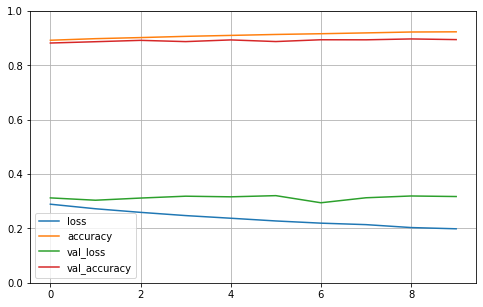

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Plots and labels

In [ ]:
train_labels   

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

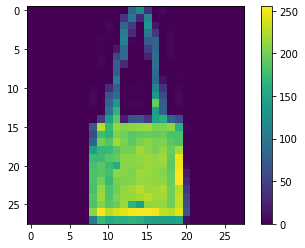

In [ ]:
plt.figure()
plt.imshow(train_images[200])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
len(class_names)

10

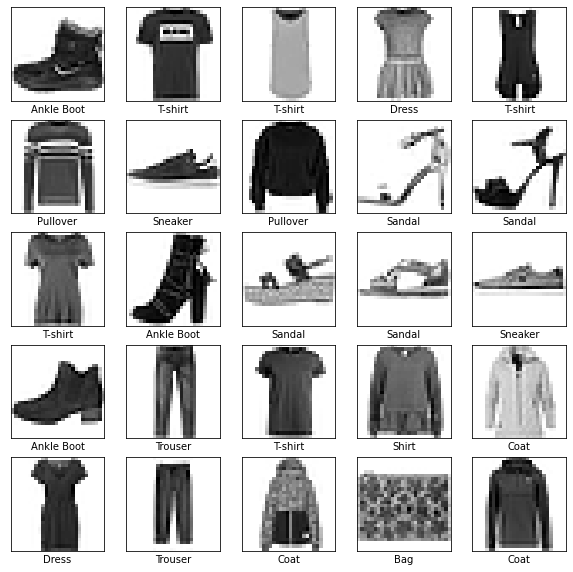

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()